# Grafos Metabólicos

Esse programa se baseia na tentaitiva retornar ao usuáriouma rota entre dois metabólitos fornecidos por ele, destacando os metabólitos intermediários e as enzimas envolvidas, com base no mapa metabólito abaixo, nesse processo em uma estrutura computacional de grafo.

Para tal, será utilizada a função `procurar_rota()`. Mas antes de rodar essa célula, existem alguns importantes passos e algoritmos que devem ser realizados.

Primeiro, é preciso que o usuário possua a biblioteca `networkx`, o módulo `IPython.display` e o softaware `Graphviz` ou `Pygraphviz` [[http://pygraphviz.github.io/](http://pygraphviz.github.io/)] instalados em sua máquina. Eles serão imprescindíveis na parte de visualização do grafo posteriormente no código.

In [66]:
mapa_metabolico ={
    
    #Glicólise
    "glicose": {
        "glicose-6-fosfato": {"label": "hexocinase"}
    },
    "glicose-6-fosfato": {
        "frutose-6-fosfato": {"label": "fosfo-hexose-isomerase"}
    },
    "frutose-6-fosfato": { 
        "glicose-6-fosfato": {"label": "fosfo-hexose-isomerase"},
        "frutose-1,6-bisfosfato": {"label": "fosfofrutocinase 1"}
    },
    "frutose-1,6-bisfosfato": {
        "gliceraldeído-3-fosfato": {"label": "aldolase"},
        "di-hidroxiacetona-fosfato": {"label": "aldolase"},
    },
    "di-hidroxiacetona-fosfato": {
        "frutose-1,6-bisfosfato": {"label": "aldolase"},
        "(2) gliceraldeído-3-fosfato": {"label": "triose-fosfato-isomerase"}
    },    
    "gliceraldeído-3-fosfato": {
        "frutose-1,6-bisfosfato": {"label": "aldolase"},
        "(2) gliceraldeído-3-fosfato": {"label": ""}
    },
    "(2) gliceraldeído-3-fosfato": {
        "(2) 1,3-bisfosfoglicerato": {"label": "gliceraldeido-3-fosfato-desidrogenase"}
    },
    "(2) 1,3-bisfosfoglicerato": {
        "(2) gliceraldeído-3-fosfato": {"label": ""},
        "(2) 3-fosfoglicerato": {"label": "fosfoglicerato-cinase"}
    },
    "(2) 3-fosfoglicerato": {
        "(2) 1,3-bisfosfoglicerato": {"label": "gliceraldeido-3-fosfato-desidrogenase"},
        "(2) 2-fosfoglicerato": {"label": "fosfoglicerato-mutase"}
    },
    "(2) 2-fosfoglicerato":{
        "(2) 3-fosfoglicerato": {"label": "fosfoglicerato-mutase"},
        "(2) fosfoenolpiruvato": {"label": "enolase"}
    },
    "(2) fosfoenolpiruvato": {
        "(2) 2-fosfoglicerato": {"label": "enolase"},
        "(2) piruvato": {"label": "piruvato-cinase"}
    },
    
    #Fermentação 
    "(2) piruvato": {"lactato": {"label": "(lática) lactato desidrogenase"},
        "NAD+": {"label": "(lática) lactato desidrogenase"},
        "acetaldeído": {"label": "(alcóolica) piruvato descarboxilase"},
        "CO2": {"label": "(alcóolica) piruvato descarvoxilase"},
        "acetil-CoA" : {"label": "piruvato-desidrogenase"} #processamento de piruvato entre a glicólise e o ciclo de krebs
    },
    "acetaldeído": {
        "etanol": {"label": " (alcólica) álcool desidrogenase"},
        "NAD+": {"label": "álcool desidrogenase"}
    },

    #Ciclo de Krebs
    "acetil-CoA": {
        "citrato": {"label": "citrato-sintetase "},
        "malonil-CoA": {"label": "acetil-CoA carboxilase (ACC)"},
    },
    "citrato": {
        "cis-aconitato": {"label": "aconitase"},
        "oxalacetato": {"label": "ATP-citrato liase"},
        "acetil-CoA": {"label": "ATP-citrato liase"}
    },
    "cis-aconitato":{
        "isocitrato": {"label": "aconitase"},
        "citrato": {"label": ""}
    },
    "isocitrato": {
        "oxalosuccinato": {"label":"isocitrato-desidrogenase"},
        "cis-aconitato": {"label": ""}
    },
    "oxalosuccinato":{
        "a-cetoglutarato": {"label": "isocitrato-desidrogenase"},
        "isocitrato": {"label": ""}
    },
    "alfa-cetoglutarato": {
        "succinil-CoA": {"label": "alfa-cetoglutarato-desidrogenase"},
        "oxalosuccinato": {"label": ""}
    },
    "succinil-CoA": {
        "succinato": {"label": "succinil-CoA-Sintetase"},
        "alfa-cetoglutarato": {"label": ""}
    },
    "succinato": {
        "fumarato": {"label": "succinato-desidrogenase"},
        "succinil-CoA": {"label": ""}
    },
    "fumarato": {
        "L-malato": {"label": "fumarase"},
        "succinato": {"label": ""}
    }, 
    "L-malato": {
        "oxalacetato": {"label": "malato-desidrogenase"},
        "fumarato": {"label": ""}
    },
    "oxalacetato": {
        "citrato": {"label": ""},
        "L-malato": {"label": ""}
    },
    
    #Síntese de ácidos graxos:
    "malonil-CoA": {
        "palmitato": {"label": "ácido graxo sintase"}
    },

    #Beta-Oxidação
    "palmitato": {
        "acil-CoA": {"label": "acil-CoA-sintetase"}
    },
    "acil-CoA": {
        "trans-Δ²-Enoil-CoA": {"label": "acil-CoA-desidrogenase"} 
    },
    "trans-Δ²-Enoil-CoA":{
        "beta-hidroxiacil-CoA": {"label": "enoil-CoA-hidratase"},
    },
    "beta-hidroxiacil-CoA": {
        "beta-cetoacil-CoA": {"label": "beta-hidroxiacilCoA-desidrogenase"},
    },
    "beta-cetoacil-CoA":{
        "acetil-CoA":{"label": "acil-CoA-acetiltransferase"},
        "acil-CoA":{"label": "acil-CoA-acetiltransferase"}
    }
}

## Adaptação do Mapa
Primeiramente, o grafo original do mapa metabólito passa por um processamento das strings que indicam todas as suas chaves e valores para retirar a indicação de dobro de moléculas realizada na parte da glicólise, pois o foco do programa é analisar os metabólitos e as reações entre eles em si, não suas quantidades ou proporções. Posteriormente, o garafo também foi transformado em direcional, para trabalhar apenas com as vias diretas do metabolismo.

In [67]:
def tira_dobro(grafo):
    novo_grafo = {}
    for chave, valor in grafo.items():
        if chave.startswith("(2) "):
            nova_chave = chave.replace("(2) ", "")
        else:
            nova_chave = chave

        novo_valor = {}
        for item, label in valor.items():
            if item.startswith("(2) "):
                novo_item = item.replace("(2) ", "")
            else:
                novo_item = item
            novo_valor[novo_item] = label

        novo_grafo[nova_chave] = novo_valor
        
    return novo_grafo

In [68]:
def nao_direcional_em_direcional(grafo):
    novo_grafo = {}
    arestas_inclusas = set()

    for vertice, vizinhos in grafo.items():
        novo_grafo[vertice] = {}
        for vizinho, label in vizinhos.items():
            if (vizinho, vertice) not in arestas_inclusas:
                arestas_inclusas.add((vertice, vizinho))
                novo_grafo[vertice][vizinho] = label
                
    return novo_grafo

In [69]:
def modificacoes_grafo(grafo):
    grafo_modificado = nao_direcional_em_direcional(grafo)
    grafo_modificado = tira_dobro(grafo_modificado)
    
    return grafo_modificado

In [70]:
modificacoes_grafo(mapa_metabolico)

{'glicose': {'glicose-6-fosfato': {'label': 'hexocinase'}},
 'glicose-6-fosfato': {'frutose-6-fosfato': {'label': 'fosfo-hexose-isomerase'}},
 'frutose-6-fosfato': {'frutose-1,6-bisfosfato': {'label': 'fosfofrutocinase 1'}},
 'frutose-1,6-bisfosfato': {'gliceraldeído-3-fosfato': {'label': 'aldolase'},
  'di-hidroxiacetona-fosfato': {'label': 'aldolase'}},
 'di-hidroxiacetona-fosfato': {'gliceraldeído-3-fosfato': {'label': 'triose-fosfato-isomerase'}},
 'gliceraldeído-3-fosfato': {'1,3-bisfosfoglicerato': {'label': 'gliceraldeido-3-fosfato-desidrogenase'}},
 '1,3-bisfosfoglicerato': {'3-fosfoglicerato': {'label': 'fosfoglicerato-cinase'}},
 '3-fosfoglicerato': {'2-fosfoglicerato': {'label': 'fosfoglicerato-mutase'}},
 '2-fosfoglicerato': {'fosfoenolpiruvato': {'label': 'enolase'}},
 'fosfoenolpiruvato': {'piruvato': {'label': 'piruvato-cinase'}},
 'piruvato': {'lactato': {'label': '(lática) lactato desidrogenase'},
  'NAD+': {'label': '(lática) lactato desidrogenase'},
  'acetaldeído': 

## Busca da Rota
A partir do mapa metabólico, da entrada e da saída desejada pelo usuário, o algoritmo abaixo tenta encontrar se existe um caminho possível para interligá-los. Para tal, é realizado algoritmo adaptado de busca em profundidade em grafo para que a partir de um vértice inicial se “aprofunde” em um ramo específico o máximo possível, na tentativa de estabelecer uma conexão de forma mais direta. Caso possível estabelecer uma rota, será retornado ao usuário uma lista contendo todos os vértices do grafos envolvidos nesse processo.

In [71]:
def busca_em_profundidade_direcionada(vertice_inicial, vertice_final, grafo, visitados=None):
    grafo = tira_dobro(grafo)
    
    if visitados is None:
        visitados = []

    visitados.append(vertice_inicial)

    if vertice_inicial == vertice_final:
        return visitados

    for vizinho in grafo.get(vertice_inicial, {}):
        if vizinho not in visitados:
            resultado = busca_em_profundidade_direcionada(vizinho, vertice_final, grafo, visitados.copy())
            if resultado and resultado[-1] == vertice_final:
                return resultado

    return None

## Transformação da rota em grafo
Cria um novo grafo ponderado pelas enzimas da rota metabólica a partir da saída da função `busca_em_profundidade_direcionada`. A cauda da aresta é um item da lista de saída, a cabeça é o item seguinte e o peso da aresta é a enzima correspondente à cauda.

In [73]:
def rota_em_grafo(vertice_inicial, vertice_final, grafo):
    grafo = modificacoes_grafo(grafo)
    rota = busca_em_profundidade_direcionada(vertice_inicial, vertice_final, grafo)
    
    if rota == None:
        print("Não é possível estabelecer uma rota direta entres esses metabólitos, pelo grafo de mapa metabólico.")

    else:
        novo_grafo = {}
        
        for vertice in rota:
            novo_grafo[vertice] = {}
    
        for i in range(len(rota)-1):
            vertice_atual = rota[i]
            proximo_vertice = rota[i+1]
        
            if proximo_vertice in grafo[vertice_atual]:
                novo_grafo[vertice_atual][proximo_vertice] = grafo[vertice_atual][proximo_vertice]
            else:
                novo_grafo[vertice_atual][proximo_vertice] = {}
    
        return novo_grafo

## Visualização da Rota 
A partir do grafo estruturado na função anterior, é impressa uma visualização dele com o software `Graphviz`. Nessa função, questões de layout dessa imagem também foram definidos para aprimorar visual e esteticamente o retorno final do programa.

_[Erros podem ocorrer nessa parte caso o software não esteja instalado corretamente na sua máquina, podendo obter a estrutura do grafo pelo site [https://dreampuf.github.io/GraphvizOnline/](https://dreampuf.github.io/GraphvizOnline/).]_

In [86]:
def visualizacao_da_rota(vertice_inicial, vertice_final, grafo):
    grafo_rota = rota_em_grafo(vertice_inicial, vertice_final, grafo)

    import networkx as nx
    g = nx.DiGraph(grafo_rota)

    from networkx.drawing.nx_agraph import to_agraph

    grafo_rota = to_agraph(g)
 
    from IPython.display import Image, display

    grafo_rota.graph_attr["overlap"] = "false"
    grafo_rota.graph_attr["size"] = "25,20!"
    grafo_rota.graph_attr["dpi"] = "200"
    grafo_rota.graph_attr["forcelabels"] = "true"
    grafo_rota.graph_attr["concentrate"] = "false"
    grafo_rota.graph_attr["nodesep"] = "0.5"
    grafo_rota.graph_attr["ranksep"] = "1"
    grafo_rota.graph_attr["pad"] = "1.5"
    grafo_rota.graph_attr["scale"] = "3"

    for nodename in grafo_rota.nodes():
         node = grafo_rota.get_node(nodename)
         node.attr["fontcolor"] = "black"

    for aresta in grafo_rota.edges():
        aresta.attr["fontcolor"] = "red"  
    
    display(Image(grafo_rota.draw(format="png", prog="dot")))
    grafo_rota.draw("grafo_rota.png", format="png", prog="dot")

## Rota com Metabólitos e Enzimas
A função `metabolitos_e_enzimas` acessa o dicionário e verifica se a rota é possível. Se não, ela retorna ao usuário que o caminho proposto não é alcançável. Do contrário, ela retorna os metabólitos envolvidos no caminho desde o metabólito inicial até o metabólito final informado pelo usuário.

In [87]:
def metabolitos_e_enzimas(vertice_inicial, vertice_final, grafo):
    rota_com_enzimas = rota_em_grafo(vertice_inicial, vertice_final, grafo)
    
    if rota_com_enzimas == None:
        print("Não pare de tentar, teste outras entradas e saídas!")
    
    else:    
        lista_da_rota = list(rota_com_enzimas.keys())
        print(f"Para obter o(a) {vertice_final} a partir do(a) {vertice_inicial}, é preciso fazer pela rota:") 

        for i in range(len(lista_da_rota) - 1):
            enzima = rota_com_enzimas[lista_da_rota[i]][lista_da_rota[i + 1]].get("label", "")
            print(f"Metabolito: {lista_da_rota[i]} -> [Enzima: {enzima}] ->") 

        print(f"Produto: {lista_da_rota[-1]}")
        
        visualizacao_da_rota(vertice_inicial, vertice_final, grafo)

## Banco de Metabólitos
Por fim, na função principal também será demonstrado os metabólitos que são possíveis o usário escolher. Ele então deve copiar dois desses elementos para testar se há uma reta direta entre eles.

In [80]:
def banco_de_metabolitos(grafo):
    grafo = tira_dobro(grafo)
    vertices_repetidos = []
    vertices = list(vertices_repetidos)
 
    for origem in grafo:
        vertices.append(origem)
        for destino in grafo[origem]:
            vertices.append(destino)
 
    return set(vertices)

# Função Principal - Procurar Rota

Aqui o programa é propriamente apresentado ao usuário para que ele possa explorar o mapa maetabólico e testar suas rotas. Recomenda-se que ele observe também as principais rotas acontecem nas células para tentar estabelecer rotas possíveis entre elas!

In [81]:
def procurar_rota():
    print("""Olá! Bem-vindo(a) ao Rotas Metabólicas!
    
    Esse programa é capaz de utilizar as vias reais do metabolismo energético de mamíferos
    para tentar demonstrar uma rota entre dois metabólitos orgânicos a serem analisados por meio
    da estrutura computacional de Grafos. Escolha dois elementos do Banco de Metabólitos abaixo
    e descubra se há uma rota direta entre eles!""")
    print("")

    print(f"Banco de Metabólitos =")
    print(banco_de_metabolitos(mapa_metabolico))
    print("")
          
    vertice_inicial = str(input("Qual seria o metabólito inicial da rota procurada?"))
    vertice_final = str(input("Qual seria o metabólito final da rota procurada?"))
    metabolitos_e_enzimas(vertice_inicial, vertice_final, mapa_metabolico)

Olá! Bem-vindo(a) ao Rotas Metabólicas!
    
    Esse programa é capaz de utilizar as vias reais do metabolismo energético de mamíferos
    para tentar demonstrar uma rota entre dois metabólitos orgânicos a serem analisados por meio
    da estrutura computacional de Grafos. Escolha dois elementos do Banco de Metabólitos abaixo
    e descubra se há uma rota direta entre eles!

Banco de Metabólitos =
{'malonil-CoA', 'acetaldeído', 'etanol', 'oxalosuccinato', 'piruvato', 'di-hidroxiacetona-fosfato', 'a-cetoglutarato', 'alfa-cetoglutarato', 'citrato', 'beta-cetoacil-CoA', 'glicose-6-fosfato', 'glicose', 'succinato', 'fumarato', 'palmitato', 'acetil-CoA', 'frutose-6-fosfato', 'isocitrato', 'cis-aconitato', 'L-malato', 'gliceraldeído-3-fosfato', 'beta-hidroxiacil-CoA', 'frutose-1,6-bisfosfato', 'CO2', 'succinil-CoA', 'fosfoenolpiruvato', 'lactato', 'oxalacetato', '3-fosfoglicerato', 'trans-Δ²-Enoil-CoA', '2-fosfoglicerato', 'acil-CoA', '1,3-bisfosfoglicerato', 'NAD+'}



Qual seria o metabólito inicial da rota procurada? piruvato
Qual seria o metabólito final da rota procurada? oxalosuccinato


Para obter o(a) oxalosuccinato a partir do(a) piruvato, é preciso fazer pela rota:
Metabolito: piruvato -> [Enzima: piruvato-desidrogenase] ->
Metabolito: acetil-CoA -> [Enzima: citrato-sintetase ] ->
Metabolito: citrato -> [Enzima: aconitase] ->
Metabolito: cis-aconitato -> [Enzima: aconitase] ->
Metabolito: isocitrato -> [Enzima: isocitrato-desidrogenase] ->
Produto: oxalosuccinato


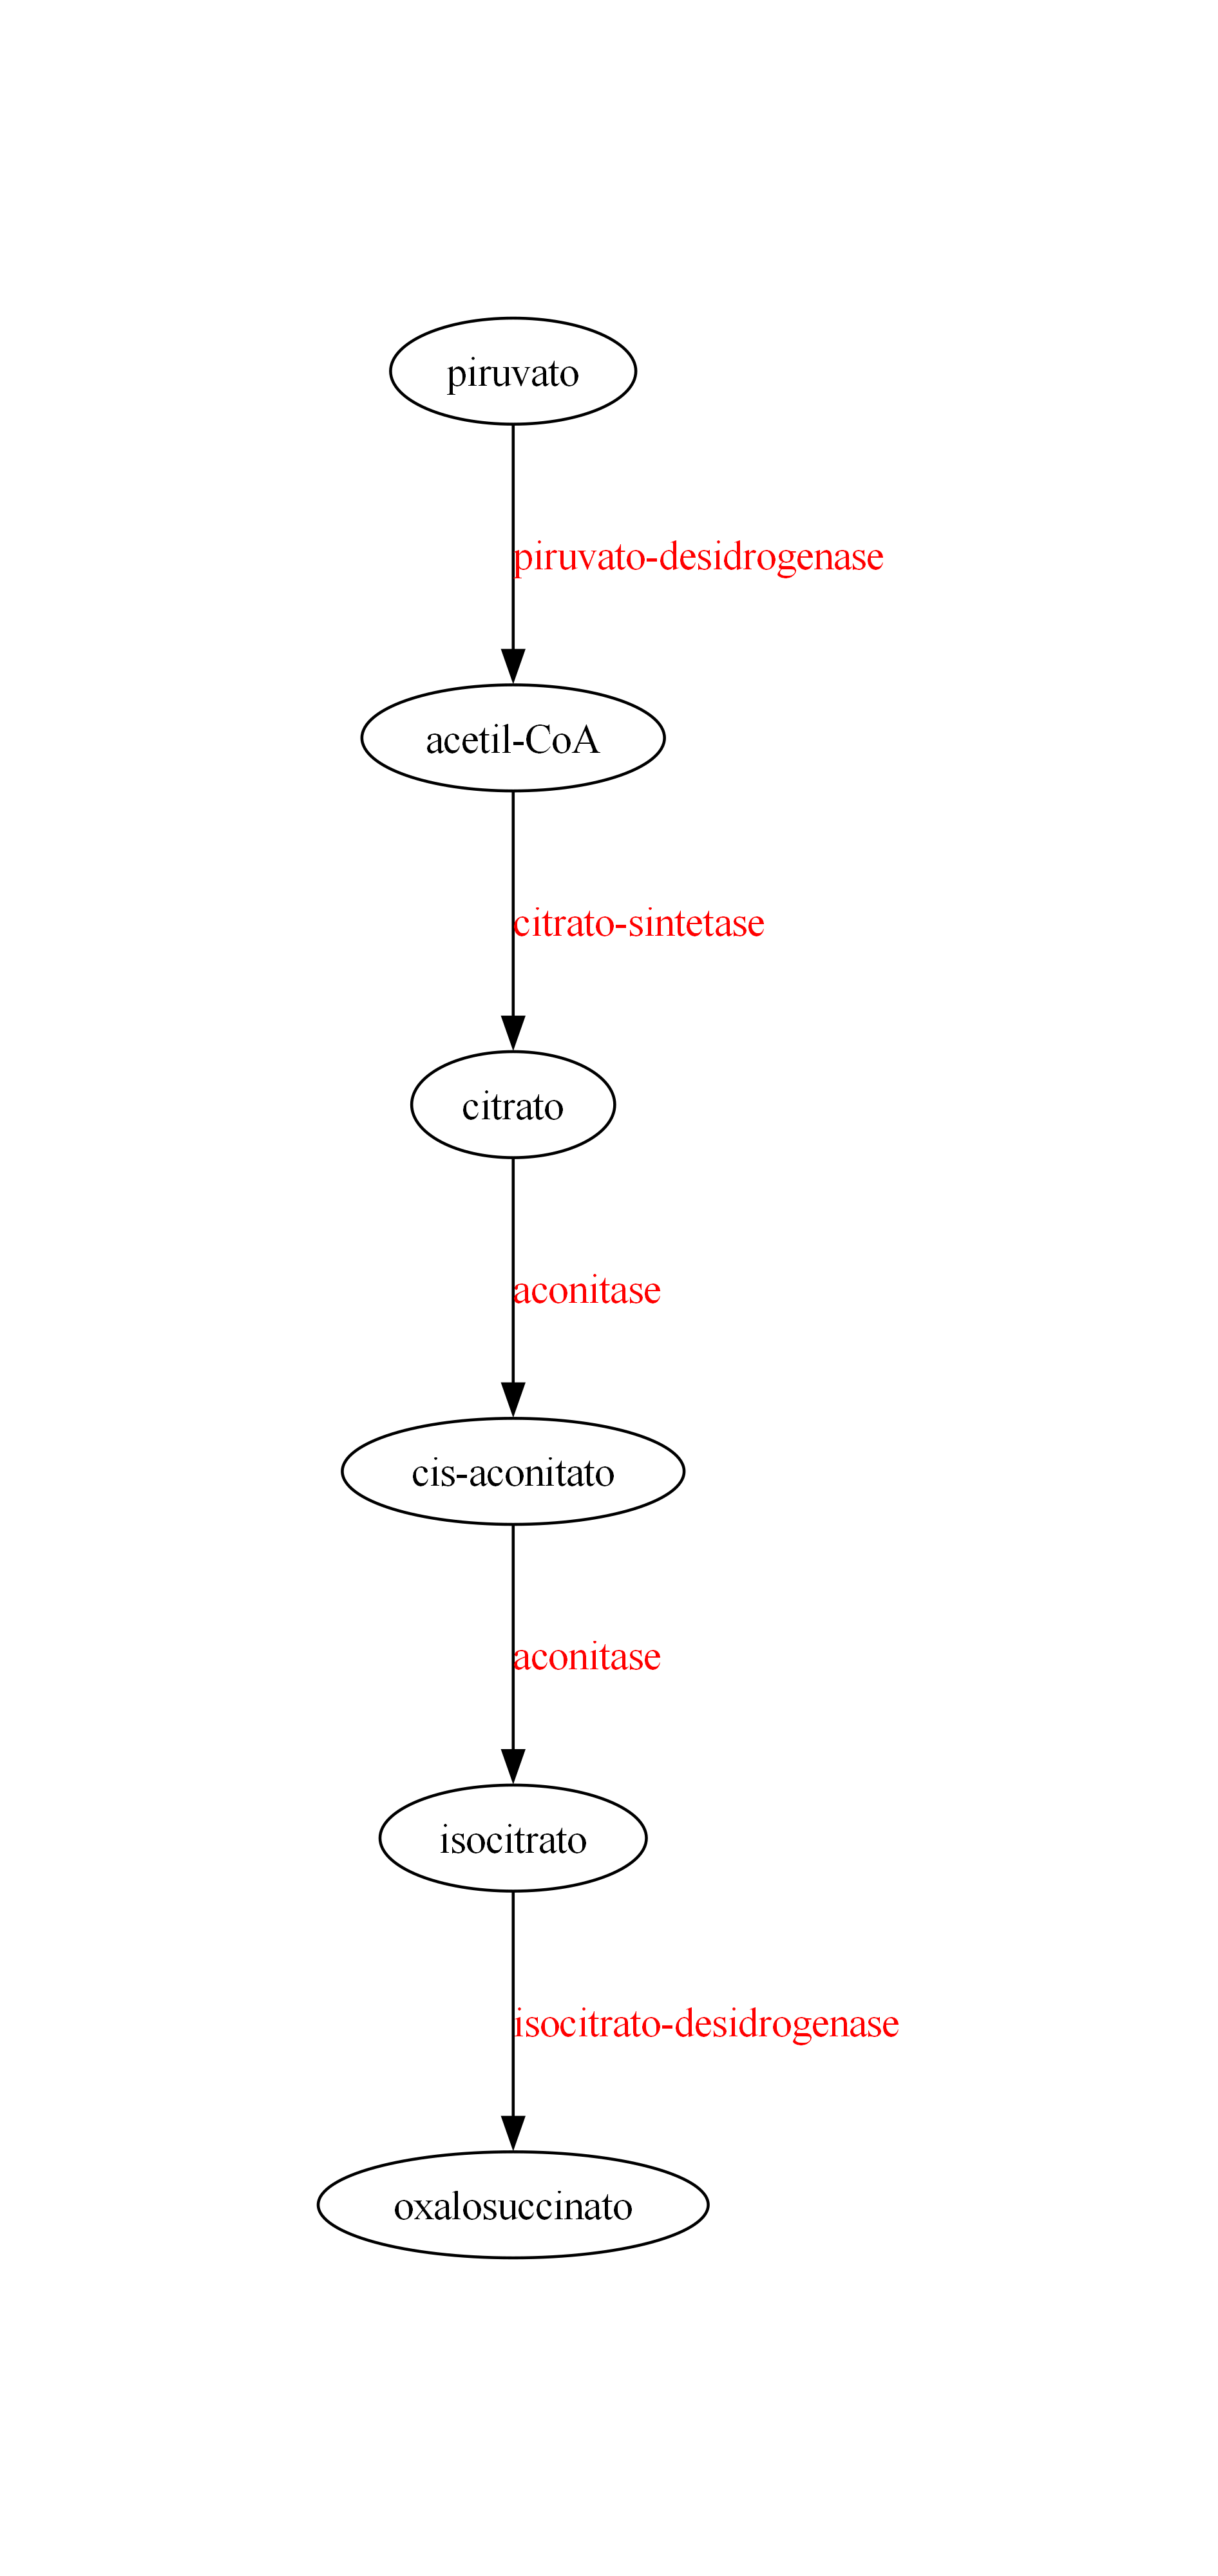

In [85]:
procurar_rota()